In [1]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

## Load Datasets

In [2]:
# Load the benificiary(Hospital) data
benificiary_ds = pd.read_csv("Beneficiarydatafile.csv")

In [3]:
#exploring the dataset by getting the shape and first few rows of data
print(benificiary_ds.shape)
print(benificiary_ds.columns)
benificiary_ds.head()

(138556, 25)
Index(['Beneficiary_ID', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')


,Beneficiary_ID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,01-01-1943,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,01-09-1936,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,01-08-1936,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,01-07-1922,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,01-09-1935,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
# Load the insurance Provider dataset
provider_ds = pd.read_csv("Provider_Dataset.csv")

C:\Users\kavya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#exploring the dataset by getting the shape and first few rows of data
print(provider_ds.shape)
print(provider_ds.columns)
provider_ds.head()

(558211, 31)
Index(['AdmissionDate', 'Attended_Physician', 'Beneficiary_ID',
       'Claim_End_Date', 'Claim_ID', 'Claim_Start_Date', 'Clm_Admit_Code',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Deductible_Amount_Paid', 'Diagnosis_Group_Code',
       'Discharge_date', 'Insurance_Amount_Reimbursed', 'OperatingPhysician',
       'OtherPhysician', 'PatientType', 'Provider_Hospital'],
      dtype='object')


,AdmissionDate,Attended_Physician,Beneficiary_ID,Claim_End_Date,Claim_ID,Claim_Start_Date,Clm_Admit_Code,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,ClmProcedureCode_5,ClmProcedureCode_6,Deductible_Amount_Paid,Diagnosis_Group_Code,Discharge_date,Insurance_Amount_Reimbursed,OperatingPhysician,OtherPhysician,PatientType,Provider_Hospital
0,12-04-2009,PHY390922,BENE11001,18-04-2009,CLM46614,12-04-2009,7866,1970,NaN,4019,...,NaN,NaN,1068.0,201,18-04-2009,26000,NaN,NaN,0,PRV55912
1,31-08-2009,PHY318495,BENE11001,02-09-2009,CLM66048,31-08-2009,6186,6186,NaN,2948,...,NaN,NaN,1068.0,750,02-09-2009,5000,PHY318495,NaN,0,PRV55907
2,17-09-2009,PHY372395,BENE11001,20-09-2009,CLM68358,17-09-2009,29590,29623,NaN,30390,...,NaN,NaN,1068.0,883,20-09-2009,5000,NaN,PHY324689,0,PRV56046
3,14-02-2009,PHY369659,BENE11011,22-02-2009,CLM38412,14-02-2009,431,43491,NaN,2762,...,NaN,NaN,1068.0,67,22-02-2009,5000,PHY392961,PHY349768,0,PRV52405
4,13-08-2009,PHY379376,BENE11014,30-08-2009,CLM63689,13-08-2009,78321,42,NaN,3051,...,NaN,NaN,1068.0,975,30-08-2009,10000,PHY398258,NaN,0,PRV56614


In [10]:
# Load the training dataset
trainfraud_ds = pd.read_excel("Train_Dataset.xlsx")

In [11]:
#Print the shape of the data set ( rows & columns) & sample 5 rows
print(trainfraud_ds.shape)
trainfraud_ds.head()

(3998, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [12]:
# Load the test dataset
testfraud_ds = pd.read_excel("Test_Dataset.xlsx")

In [13]:
# Print the shape( rows & columns) of the test dataset & sample 5 rows
print(testfraud_ds.shape)
testfraud_ds.head()

(1412, 1)


,Provider_ID
0,PRV56004
1,PRV56005
2,PRV56006
3,PRV56007
4,PRV56008


## Check Missing values in Benificiary & Provider dataset

In [14]:
# Check the missing values in Benificiary dataset
benificiary_ds.isna().sum()

Beneficiary_ID                          0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [15]:
# check the missing values in Provider dataset
provider_ds.isna().sum()

AdmissionDate                  517737
Attended_Physician               1508
Beneficiary_ID                      0
Claim_End_Date                      0
Claim_ID                            0
Claim_Start_Date                    0
Clm_Admit_Code                 412312
ClmDiagnosisCode_1              10453
ClmDiagnosisCode_10            553201
ClmDiagnosisCode_2             195606
ClmDiagnosisCode_3             315156
ClmDiagnosisCode_4             393675
ClmDiagnosisCode_5             446287
ClmDiagnosisCode_6             473819
ClmDiagnosisCode_7             492034
ClmDiagnosisCode_8             504767
ClmDiagnosisCode_9             516396
ClmProcedureCode_1             534901
ClmProcedureCode_2             552721
ClmProcedureCode_3             557242
ClmProcedureCode_4             558093
ClmProcedureCode_5             558202
ClmProcedureCode_6             558211
Deductible_Amount_Paid            899
Diagnosis_Group_Code           517737
Discharge_date                 517737
Insurance_Am

In [16]:
# Check the missing values in Train dataset
trainfraud_ds.isna().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [17]:
# Check the missing values in Test dataset
testfraud_ds.isna().sum()

Provider_ID    0
dtype: int64

## Data Preprocessing & Add Required Features

In [18]:
# Calculate Age based on DOB & DOD and add as a feature
benificiary_ds['DOB'] = pd.to_datetime(benificiary_ds['DOB'] , format = '%d-%m-%Y')
benificiary_ds['DOD'] = pd.to_datetime(benificiary_ds['DOD'],format = '%d-%m-%Y',errors='ignore')
benificiary_ds['Age'] = round(((benificiary_ds['DOD'] - benificiary_ds['DOB']).dt.days)/365)

In [19]:
# Age missing values
benificiary_ds.Age.isna().sum()

137135

In [20]:
# Find max date of DOD to fill age of other missing attributes
print(benificiary_ds.DOD.min())
print(print(benificiary_ds.DOD.max()))

2009-02-01 00:00:00
2009-12-01 00:00:00
None


In [21]:
# Count age for all age missing values rows with 01-12-2009 date as it is the max date for DOD
benificiary_ds.Age.fillna(round(((pd.to_datetime('01-12-2009' , format = '%d-%m-%Y') - benificiary_ds['DOB']).dt.days)/365),
                                 inplace=True)

In [22]:
# check Age missing values now - it should be 0. And print sample 5 rows
print(benificiary_ds.Age.isna().sum())
benificiary_ds.head()

0


,Beneficiary_ID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,2,0,0,30,50,73.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,2,1,2,2,2,0,0,90,40,73.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,2,0,0,1810,760,87.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,2,2,2,2,0,0,1790,1200,74.0


In [23]:
# Create a feature whether the patient deceased or not. 1 indicates deceased and 0 is not.
benificiary_ds.loc[benificiary_ds.DOD.isna(),'Deceased']=0
benificiary_ds.loc[benificiary_ds.DOD.notna(),'Deceased']=1
benificiary_ds.head()

,Beneficiary_ID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,67.0,0.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,73.0,0.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,73.0,0.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,87.0,0.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,74.0,0.0


In [24]:
# RenalDiseaseIndicator feature has values as 0 & Y - converting Y as 1 to make more readable
benificiary_ds = benificiary_ds.replace({'RenalDiseaseIndicator': 'Y'}, 1)
print(benificiary_ds.RenalDiseaseIndicator.unique())

['0' 1]


In [25]:
# Chronic deceases has values as 1 & 2. It is improper to have value 2 when there is no decease. Replacing 2 as 0.
benificiary_ds = benificiary_ds.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
benificiary_ds.head()

,Beneficiary_ID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,30,50,73.0,0.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,0,0,0,0,0,90,40,73.0,0.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,0,0,0,1810,760,87.0,0.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,0,0,0,0,0,0,1790,1200,74.0,0.0


In [26]:
provider_ds['AdmissionDate'] = pd.to_datetime(provider_ds['AdmissionDate'] , format = '%d-%m-%Y')
provider_ds['Discharge_date'] = pd.to_datetime(provider_ds['Discharge_date'],format = '%d-%m-%Y')
provider_ds['NoofDaysAdmitted'] = ((provider_ds['Discharge_date'] - provider_ds['AdmissionDate']).dt.days)+1

In [27]:
print(provider_ds.NoofDaysAdmitted.isna().sum()) #Missing values. should be same as Admission Date & Discharge date
print(provider_ds.NoofDaysAdmitted.min()) # Min value
print(provider_ds.NoofDaysAdmitted.max()) # Max value
provider_ds.head() # Sample 5 rows

517737
1.0
36.0


,AdmissionDate,Attended_Physician,Beneficiary_ID,Claim_End_Date,Claim_ID,Claim_Start_Date,Clm_Admit_Code,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,ClmProcedureCode_6,Deductible_Amount_Paid,Diagnosis_Group_Code,Discharge_date,Insurance_Amount_Reimbursed,OperatingPhysician,OtherPhysician,PatientType,Provider_Hospital,NoofDaysAdmitted
0,2009-04-12,PHY390922,BENE11001,18-04-2009,CLM46614,12-04-2009,7866,1970,NaN,4019,...,NaN,1068.0,201,2009-04-18,26000,NaN,NaN,0,PRV55912,7.0
1,2009-08-31,PHY318495,BENE11001,02-09-2009,CLM66048,31-08-2009,6186,6186,NaN,2948,...,NaN,1068.0,750,2009-09-02,5000,PHY318495,NaN,0,PRV55907,3.0
2,2009-09-17,PHY372395,BENE11001,20-09-2009,CLM68358,17-09-2009,29590,29623,NaN,30390,...,NaN,1068.0,883,2009-09-20,5000,NaN,PHY324689,0,PRV56046,4.0
3,2009-02-14,PHY369659,BENE11011,22-02-2009,CLM38412,14-02-2009,431,43491,NaN,2762,...,NaN,1068.0,67,2009-02-22,5000,PHY392961,PHY349768,0,PRV52405,9.0
4,2009-08-13,PHY379376,BENE11014,30-08-2009,CLM63689,13-08-2009,78321,42,NaN,3051,...,NaN,1068.0,975,2009-08-30,10000,PHY398258,NaN,0,PRV56614,18.0


## Merge Benificiary Dataset , Provider Dataset & Fraud Train Dataset

In [28]:
# Merge Benificiary Dataset & Provider dataset
benificiary_provider_ds=pd.merge(provider_ds,benificiary_ds,left_on='Beneficiary_ID',right_on='Beneficiary_ID',how='inner')

In [29]:
print(benificiary_provider_ds.shape)
print(benificiary_provider_ds.columns)
benificiary_provider_ds.head()

(558211, 58)
Index(['AdmissionDate', 'Attended_Physician', 'Beneficiary_ID',
       'Claim_End_Date', 'Claim_ID', 'Claim_Start_Date', 'Clm_Admit_Code',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Deductible_Amount_Paid', 'Diagnosis_Group_Code',
       'Discharge_date', 'Insurance_Amount_Reimbursed', 'OperatingPhysician',
       'OtherPhysician', 'PatientType', 'Provider_Hospital',
       'NoofDaysAdmitted', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'Chro

,AdmissionDate,Attended_Physician,Beneficiary_ID,Claim_End_Date,Claim_ID,Claim_Start_Date,Clm_Admit_Code,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,2009-04-12,PHY390922,BENE11001,18-04-2009,CLM46614,12-04-2009,7866,1970,NaN,4019,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,2009-08-31,PHY318495,BENE11001,02-09-2009,CLM66048,31-08-2009,6186,6186,NaN,2948,...,1,0,1,1,36000,3204,60,70,67.0,0.0
2,2009-09-17,PHY372395,BENE11001,20-09-2009,CLM68358,17-09-2009,29590,29623,NaN,30390,...,1,0,1,1,36000,3204,60,70,67.0,0.0
3,2009-02-14,PHY369659,BENE11011,22-02-2009,CLM38412,14-02-2009,431,43491,NaN,2762,...,0,0,1,1,5000,1068,250,320,96.0,0.0
4,NaT,PHY379398,BENE11011,18-01-2009,CLM144521,18-01-2009,78900,78969,NaN,78701,...,0,0,1,1,5000,1068,250,320,96.0,0.0


In [30]:
# Rename the Provider_Hospital column as Provider to match trainfraud dataset. It helps to merge both datasets
benificiary_provider_ds = benificiary_provider_ds.rename(columns = {"Provider_Hospital": "Provider"}) 

In [31]:
# Merge benificiary_provider_ds & train fraud dataset on Provider column
benificiary_provider_trainfraud_ds=pd.merge(trainfraud_ds,benificiary_provider_ds,on='Provider')

In [32]:
# Print shape of the new merged dataset & print sample rows
print(benificiary_provider_trainfraud_ds.shape)
benificiary_provider_trainfraud_ds.head()

(432881, 59)


,Provider,PotentialFraud,AdmissionDate,Attended_Physician,Beneficiary_ID,Claim_End_Date,Claim_ID,Claim_Start_Date,Clm_Admit_Code,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,PRV51001,No,NaT,PHY318842,BENE32715,30-03-2009,CLM272936,29-03-2009,78902,78964,...,1,0,0,0,2020,1068,6700,2700,74.0,0.0
1,PRV51001,No,2009-07-04,PHY340163,BENE36012,08-07-2009,CLM58316,04-07-2009,29623,29650,...,1,0,0,1,36000,1068,3520,140,69.0,0.0
2,PRV51001,No,2009-05-23,PHY346762,BENE38773,25-05-2009,CLM52334,23-05-2009,389,388,...,0,0,0,0,95000,2136,2270,900,72.0,0.0
3,PRV51001,No,NaT,PHY402512,BENE49220,04-07-2009,CLM452024,04-07-2009,78900,78965,...,1,1,0,0,5000,1068,370,70,91.0,0.0
4,PRV51001,No,2009-02-03,PHY383193,BENE98831,08-02-2009,CLM36844,03-02-2009,5362,56211,...,1,0,1,0,3000,1068,0,0,75.0,0.0


## Exploratory Data Analysis & Plots  

Percentage Distribution of Potential Fraud class:- 
 No     61.244314
Yes    38.755686
Name: PotentialFraud, dtype: float64


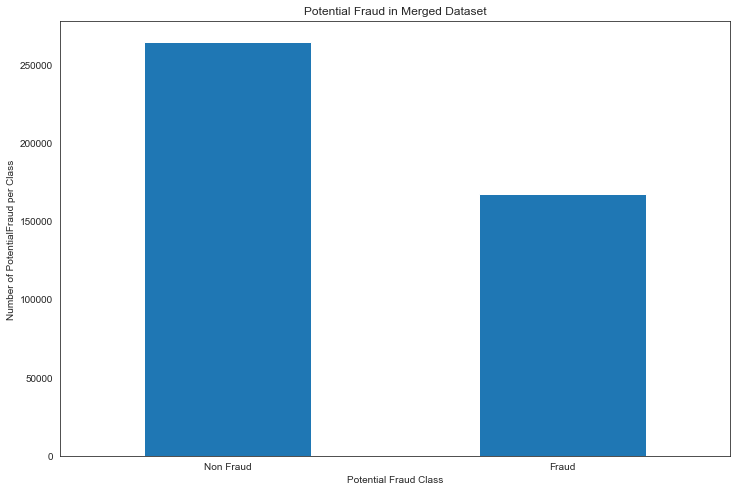

In [33]:
#PLotting the frequencies of fraud and non-fraud Merged transactions in the data

sns.set_style('white',rc={'figure.figsize':(14,10)})

compute_val = pd.value_counts(benificiary_provider_trainfraud_ds['PotentialFraud'], sort = True)
print("Percentage Distribution of Potential Fraud class:- \n",compute_val*100/len(benificiary_provider_trainfraud_ds))
headers = ["Non Fraud", "Fraud"]

compute_val.plot(kind = 'bar', rot=0,figsize=(12,8))

# Set labels and headers
plt.title("Potential Fraud in Merged Dataset")
plt.xticks(range(2), headers)
plt.xlabel("Potential Fraud Class")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudInMergedData')


Percentage Distribution of Potential Fraud class:- 
 No     90.42021
Yes     9.57979
Name: PotentialFraud, dtype: float64


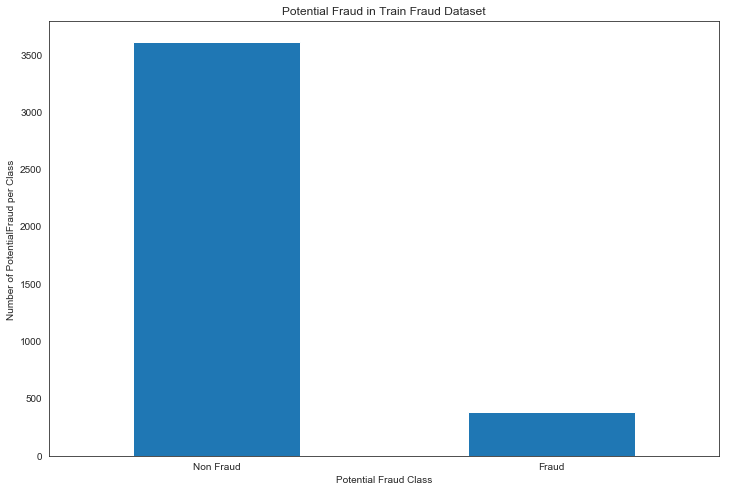

In [34]:
# Plotting the fraud & non fraud in Train Fraud Data

sns.set_style('white',rc={'figure.figsize':(14,10)})

compute_val = pd.value_counts(trainfraud_ds['PotentialFraud'], sort = True)
print("Percentage Distribution of Potential Fraud class:- \n",compute_val*100/len(trainfraud_ds))
headers = ["Non Fraud", "Fraud"]

compute_val.plot(kind = 'bar', rot=0,figsize=(12,8))

# Set labels and headers
plt.title("Potential Fraud in Train Fraud Dataset")
plt.xticks(range(2), headers)
plt.xlabel("Potential Fraud Class")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudInTrainFraudData')


In [35]:
entire_data = benificiary_provider_trainfraud_ds

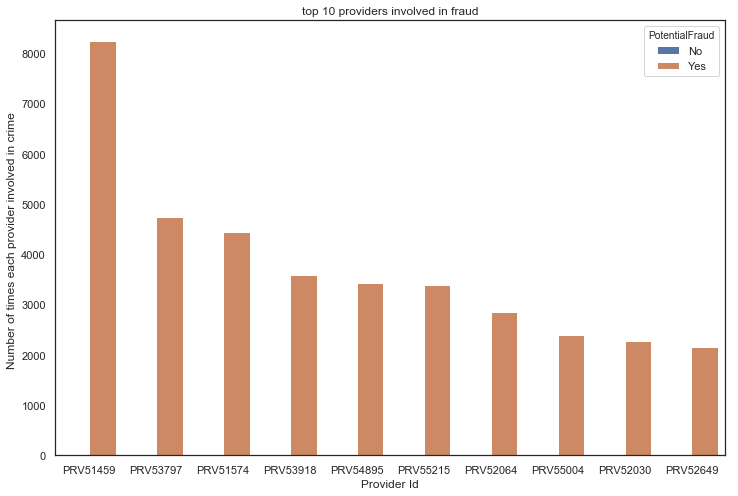

In [52]:
#Plotting the procedures involved in fraud
sns.set(rc={'figure.figsize':(12,8)},style='white')
ax=sns.countplot(x='Provider',hue='PotentialFraud',data=entire_data,order=entire_data.Provider.value_counts().iloc[:10].index)
plt.title('top 10 providers involved in fraud')
plt.xlabel("Provider Id")
plt.ylabel("Number of times each provider involved in crime ")
plt.show()

# Feature Engineering

In [53]:
#grouping the features based on the provider id and checking whether the similarities lead to fraudulent behaviour 
entire_data["Avg_age"]=entire_data.groupby('Provider')['Age'].transform('mean')
entire_data["Avg_reim_amtIP"]=entire_data.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
entire_data["Avg_deduct_amtIP"]=entire_data.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
entire_data["Avg_reim_amtOP"]=entire_data.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
entire_data["Avg_deduct_amtOP"]=entire_data.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')

In [60]:
#grouping by different features and counting the number of claims filed by providers to check whether the similarities lead to fraudulent behaviour
entire_data["count_clms_provider"]=entire_data.groupby(['Provider'])['Claim_ID'].transform('count')
entire_data["benID_clmcount_provider"]=entire_data.groupby(['Provider','Beneficiary_ID'])['Claim_ID'].transform('count')
entire_data["attndg_physi_clmcount_provider"]=entire_data.groupby(['Provider','Attended_Physician'])['Claim_ID'].transform('count')

In [124]:
entire_data.shape

(432881, 67)

In [139]:
#removing unecessary columns from the data
data_new = entire_data.iloc[:,42:]

In [140]:
data_new.head(10)

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,...,Age,Deceased,Avg_age,Avg_reim_amtIP,Avg_deduct_amtIP,Avg_reim_amtOP,Avg_deduct_amtOP,count_clms_provider,benID_clmcount_provider,attndg_physi_clmcount_provider
0,1,1,1,1,1,1,1,1,0,0,...,74.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,1.0
1,0,1,1,0,0,1,1,1,0,0,...,69.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,1.0
2,0,0,1,0,0,0,0,0,0,0,...,72.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,1.0
3,1,1,0,0,0,0,0,1,1,0,...,91.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,3.0
4,1,1,0,0,0,1,1,1,0,1,...,75.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,2.0
5,0,1,1,0,1,1,1,1,0,1,...,80.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,2.0
6,1,1,0,0,1,0,1,1,0,0,...,83.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,2,5.0
7,1,1,0,0,1,0,1,1,0,0,...,83.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,2,1.0
8,1,1,1,1,1,1,1,1,1,0,...,89.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,3.0
9,1,1,1,1,1,1,1,1,0,1,...,96.0,0.0,78.84,17606.0,897.12,2615.2,463.92,25,1,1.0


In [141]:
for columns in data_new: 
    print(columns) 

ChronicCond_Alzheimer
ChronicCond_Heartfailure
ChronicCond_KidneyDisease
ChronicCond_Cancer
ChronicCond_ObstrPulmonary
ChronicCond_Depression
ChronicCond_Diabetes
ChronicCond_IschemicHeart
ChronicCond_Osteoporasis
ChronicCond_rheumatoidarthritis
ChronicCond_stroke
IPAnnualReimbursementAmt
IPAnnualDeductibleAmt
OPAnnualReimbursementAmt
OPAnnualDeductibleAmt
Age
Deceased
Avg_age
Avg_reim_amtIP
Avg_deduct_amtIP
Avg_reim_amtOP
Avg_deduct_amtOP
count_clms_provider
benID_clmcount_provider
attndg_physi_clmcount_provider


In [142]:
#creating dummies for categorical variables
data_new=pd.get_dummies(data_new,columns=['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','Deceased'],drop_first=True)

In [143]:
data_new.head(5)

,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Avg_age,Avg_reim_amtIP,Avg_deduct_amtIP,Avg_reim_amtOP,Avg_deduct_amtOP,...,ChronicCond_KidneyDisease_1,ChronicCond_Cancer_1,ChronicCond_ObstrPulmonary_1,ChronicCond_Depression_1,ChronicCond_Diabetes_1,ChronicCond_IschemicHeart_1,ChronicCond_Osteoporasis_1,ChronicCond_rheumatoidarthritis_1,ChronicCond_stroke_1,Deceased_1.0
0,2020,1068,6700,2700,74.0,78.84,17606.0,897.12,2615.2,463.92,...,1,1,1,1,1,1,0,0,0,0
1,36000,1068,3520,140,69.0,78.84,17606.0,897.12,2615.2,463.92,...,1,0,0,1,1,1,0,0,1,0
2,95000,2136,2270,900,72.0,78.84,17606.0,897.12,2615.2,463.92,...,1,0,0,0,0,0,0,0,0,0
3,5000,1068,370,70,91.0,78.84,17606.0,897.12,2615.2,463.92,...,0,0,0,0,0,1,1,0,0,0
4,3000,1068,0,0,75.0,78.84,17606.0,897.12,2615.2,463.92,...,0,0,0,1,1,1,0,1,0,0


In [144]:
#append potential fraud column to the pre-processed data frame data_new
dat1 = entire_data['PotentialFraud']

In [156]:
data_new.fillna(data_new.mean(), inplace=True)

In [157]:
#standardizing the data
sd=StandardScaler() 
sd.fit(data_new)
X_standard=sd.transform(data_new)

C:\Users\kavya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [158]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X_standard,dat1,test_size=0.3,random_state=1)

In [161]:
#building logistic regression model with
log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=1)    
log.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [187]:
#fitting the model on test data
log.fit(X_test,y_test)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [169]:
#predicting the probability of test and train dataset after fitting the values
pred_prob_train=log.predict_proba(X_train)
pred_prob_test=log.predict_proba(X_test)

In [179]:
#setting the probability as 0 if the predicted probability of fraud is < 0.7 else setting the probability as 1
test_pred = (pred_prob_test[:,1]>0.70).astype(bool)

In [180]:
#sending the values to dataframe
test_pred = pd.DataFrame(data = test_pred, columns = ['predicted_values'])

In [181]:
test_pred.head(10)

,predicted_values
0,False
1,True
2,False
3,False
4,True
5,True
6,False
7,False
8,False
9,False


In [189]:
test_pred.to_csv('Test_Dataset.csv')